# Prediktivno određivanje uspješnosti telemarketinga banaka

# 1. Uvod 
Cilj poslovnih banaka je ostvarenje profita. Banke, u pravilu, ostvaruju profit kroz zaradu od kamata koje klijenti plaćaju na kredite. Da bi mogle plasirati kredite, banke moraju imati kapital, koji uglavnom ostvaruju primajući oročene depozite klijenata. Od velike financijske krize 2008. godine, od banaka se traži da imaju velike rezerve novca kojima pokrivaju izdane kredite. Zato banke žele klijente koji će dugoročno oročiti depozite u njihovoj banci. Kako bi privukle što više klijenata da dugoročno oroče depozite, koriste se marketinške kampanje u različitim oblicima. U ovom radu promatran je oblik marketinške kampanje telemarketinga – metode u kojoj banka organizira pozivni centar iz kojeg upućuje pozive klijentima te im pokušava prodati uslugu-u ovom konkretnom slučaju nagovoriti ih na dugoročno držanje depozita u banci.
Cilj istraživanja je određivanje klasifikacijskog modeal koji će za zadanu instancu (klijenta banke) na osnovu toj instanci pridruženih značajki odrediti hoće li odabrani klijent dugoročno oročiti depozit u banci, prije uspostve samog poziva od strane pozivng centra. Dakle, želja je da banka uspije ciljano kontaktirati one klijente za koje je veća vjerojatnost da će dugoročno oročiti depozite. Glavne prednosti ovakvog ciljanog komuniciranja je smanjenje troška (za banku) i smanjenje invazivnosti na klijente.


In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline

# 2. Dataset

Za svaku kategoričku varijablu i za svaku njezinu moguću vrijednost dodana je nova kolona. Nova kolona za neku kategoričku varijablu i njezinu vrijednost je 1 ako orginalan varijabla ima tu vrijednost, 0 inače. 
Na kraju smo još numeričke varijable normalizirali na interval [0,1]

In [2]:
data = pd.read_csv('bank-additional/bank-additional-full.csv', delimiter=";")
test = pd.read_csv('bank-additional/bank-additional.csv', delimiter=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df01 = data.append(test, ignore_index=True)

In [5]:
df02=df01.dropna(axis=1, how='all')
df=df02.dropna(axis=0, how='any')
cols=df.dtypes
colnms=df.columns
i=0
cat_cols=[]
for eachcol in cols:
    if eachcol.name=="object":
        cat_cols.append(colnms[i])
    i+=1

df1=pd.get_dummies(df,columns=cat_cols)
n=len(df1.index)
m=len(df1.columns)

data_X_ALL=df1.iloc[:,0:(m-2)]
data_y_ALL=df1['y_yes']

data_X = data_X_ALL[0:41188]
data_y = data_y_ALL[0:41188]

test_X = data_X_ALL[41188:45307]
test_y = data_y_ALL[41188:45307]


scaler = MinMaxScaler()
scaler.fit(test_X)
test_X_trs = scaler.transform(test_X)

# 2. Algoritmi strojnog ućenja
Modele koje ćemo uspoređivati su Naivni Bayes, stabla odlučivanja, slučajne šume te stroj s potpornim vektorima(SVM).
# 2.1. Naivni Bayes
Naivni Bayes je model učenja koji koristi Bayesov teorem za procjenu vjerojatnosti pojedine klase. Osnovna pretpostavka algoritma je da su značajke nezavisne, što je rijetkost u praksi, no ova metoda  daje dobre rezultate. 
Koristit ćemo verziju Gaussovog naivnog Bayesa implementiranu u funkciji sklearn.naive_bayes.GaussianNB za klasifikaciju u prostoru numeričkih značajki.

In [6]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(data_X, data_y, test_size=0.33, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train_NB)
X_train_trs_NB =scaler.transform(X_train_NB)
X_test_trs_NB =scaler.transform(X_test_NB)


In [7]:
modelNB = GaussianNB()
modelNBFIT =  modelNB.fit(X_train_trs_NB, y_train_NB)

probasNB_ = modelNBFIT.predict_proba(X_test_trs_NB)
fprNB, tprNB, thresholdsNB = roc_curve(y_test_NB, probasNB_[:, 1])
roc_aucNB = auc(fprNB, tprNB)

probasNB_Test_ = modelNBFIT.predict_proba(test_X_trs)
fprNB_Test, tprNB_Test, thresholdsNB_Test = roc_curve(test_y, probasNB_Test_[:, 1])
roc_aucNB_Test = auc(fprNB_Test, tprNB_Test)

accuracyNB =  modelNB.score(X_test_NB, y_test_NB);
accuracyNB_Test =  modelNB.score(test_X_trs, test_y);
print("Accuracy NB: ")
print(accuracyNB)
print(" ")
print("Accuracy NB_Test: ")
print(accuracyNB_Test)

%time

Accuracy NB: 
0.11314647244905467
 
Accuracy NB_Test: 
0.7987375576596262
Wall time: 0 ns


<Figure size 432x288 with 0 Axes>

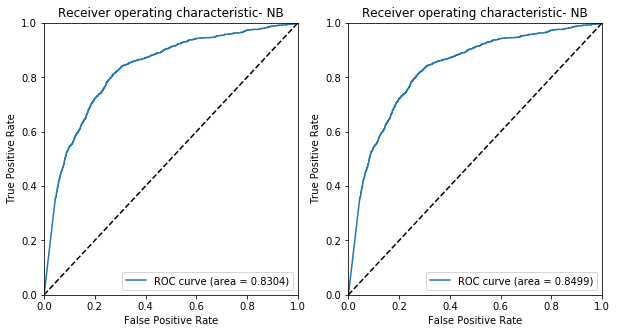

In [8]:
plt.clf()
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fprNB, tprNB, label='ROC curve (area = %0.4f)' % roc_aucNB)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('NB'))
plt.legend(loc="lower right")
plt.savefig('NB_roc.png')
plt.subplot(1, 2, 2)
plt.plot(fprNB, tprNB, label='ROC curve (area = %0.4f)' % roc_aucNB_Test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('NB'))
plt.legend(loc="lower right")
plt.show()

# 2.2. Decision Tree


### 2.2.1. max_depth=2

In [9]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(data_X, data_y, test_size=0.33, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train_DT)
X_train_trs_DT =scaler.transform(X_train_DT)
X_test_trs_DT =scaler.transform(X_test_DT)

In [10]:
modelDT2 = DecisionTreeClassifier(max_depth=2)
modelDT2Fit = modelDT2.fit(X_train_trs_DT, y_train_DT)

probasDT2_ = modelDT2Fit.predict_proba(X_test_trs_DT)
fprDT2, tprDT2, thresholdsDT2 = roc_curve(y_test_DT, probasDT2_[:, 1])
roc_aucDT2 = auc(fprDT2, tprDT2)

probasDT2_Test_ = modelDT2Fit.predict_proba(test_X_trs)
fprDT2_Test, tprDT2_Test, thresholdsDT2_Test = roc_curve(test_y, probasDT2_Test_[:, 1])
roc_aucDT2_Test = auc(fprDT2_Test, tprDT2_Test)


accuracyDT2 =  modelDT2.score(X_test_trs_DT, y_test_DT);
accuracyDT2_Test =  modelDT2.score(test_X_trs, test_y);


print("Accuracy DT2: ")
print(accuracyDT2)
print(" ")
print("Accuracy DT2_Test: ")
print(accuracyDT2_Test)
%time

Accuracy DT2: 
0.90274405944236
 
Accuracy DT2_Test: 
0.8948773974265598
Wall time: 0 ns


<Figure size 432x288 with 0 Axes>

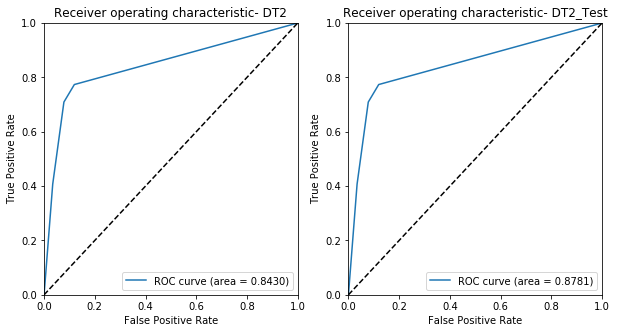

In [11]:
plt.clf()
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fprDT2, tprDT2, label='ROC curve (area = %0.4f)' % roc_aucDT2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('DT2'))
plt.legend(loc="lower right")
plt.savefig('DT2_roc.png')
plt.subplot(1, 2, 2)
plt.plot(fprDT2, tprDT2, label='ROC curve (area = %0.4f)' % roc_aucDT2_Test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('DT2_Test'))
plt.legend(loc="lower right")
plt.show()

### 2.2.2. max_depth=4

In [12]:
modelDT4 = DecisionTreeClassifier(max_depth=4)
modelDT4Fit = modelDT4.fit(X_train_trs_DT, y_train_DT) 

probasDT4_ = modelDT4Fit.predict_proba(X_test_trs_DT)
fprDT4, tprDT4, thresholdsDT4 = roc_curve(y_test_DT, probasDT4_[:, 1])
roc_aucDT4 = auc(fprDT4, tprDT4)

probasDT4_Test_ = modelDT4Fit.predict_proba(test_X_trs)
fprDT4_Test, tprDT4_Test, thresholdsDT4_Test = roc_curve(test_y, probasDT4_Test_[:, 1])
roc_aucDT4_Test = auc(fprDT4_Test, tprDT4_Test)

accuracyDT4 =  modelDT4.score(X_test_trs_DT, y_test_DT);
accuracyDT4_Test =  modelDT4.score(test_X_trs, test_y);

print("Accuracy DT4: ")
print(accuracyDT4)
print("")
print("Accuracy DT4_Test: ")
print(accuracyDT4_Test)
%time

Accuracy DT4: 
0.9123078054881189

Accuracy DT4_Test: 
0.9002184996358339
Wall time: 0 ns


<Figure size 432x288 with 0 Axes>

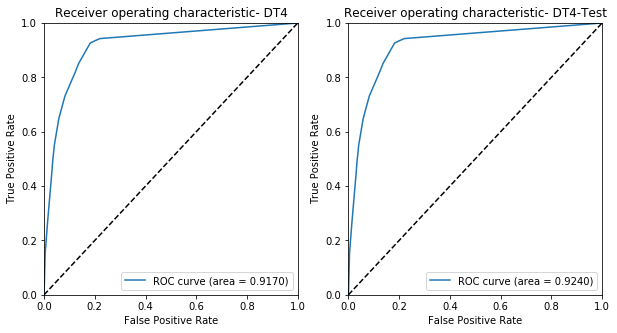

In [13]:
plt.clf()
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fprDT4, tprDT4, label='ROC curve (area = %0.4f)' % roc_aucDT4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('DT4'))
plt.legend(loc="lower right")
plt.savefig('DT4_roc.png')
plt.subplot(1, 2, 2)
plt.plot(fprDT4, tprDT4, label='ROC curve (area = %0.4f)' % roc_aucDT4_Test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('DT4-Test'))
plt.legend(loc="lower right")
plt.show()

### 2.2.3. max_dept=6

In [14]:
modelDT6 = DecisionTreeClassifier(max_depth=6)
modelDT6Fit = modelDT6.fit(X_train_trs_DT, y_train_DT)

probasDT6_ = modelDT6Fit.predict_proba(X_test_trs_DT)
fprDT6, tprDT6, thresholdsDT6 = roc_curve(y_test_DT, probasDT6_[:, 1])
roc_aucDT6 = auc(fprDT6, tprDT6)

probasDT6_Test_ = modelDT6Fit.predict_proba(test_X_trs)
fprDT6_Test, tprDT6_Test, thresholdsDT6_Test = roc_curve(test_y, probasDT6_Test_[:, 1])
roc_aucDT6_Test = auc(fprDT6_Test, tprDT6_Test)


accuracyDT6 =  modelDT6.score(X_test_trs_DT, y_test_DT);
accuracyDT6_Test =  modelDT6.score(test_X_trs, test_y);

print("Accuracy DT6: ")
print(accuracyDT6)
print("")
print("Accuracy DT6_Test: ")
print(accuracyDT6_Test)
%time

Accuracy DT6: 
0.9116456999926432

Accuracy DT6_Test: 
0.8975479485311969
Wall time: 0 ns


<Figure size 432x288 with 0 Axes>

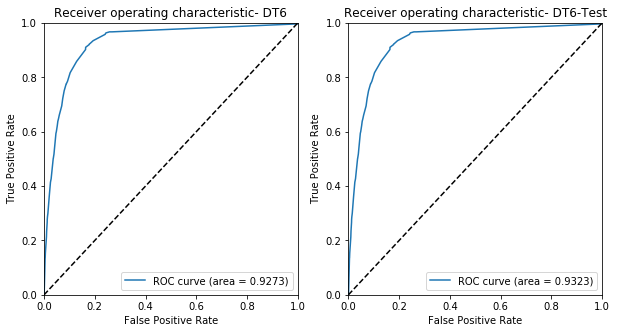

In [15]:
plt.clf()
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fprDT6, tprDT6, label='ROC curve (area = %0.4f)' % roc_aucDT6)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('DT6'))
plt.legend(loc="lower right")
plt.savefig('DT6_roc.png')
plt.subplot(1, 2, 2)
plt.plot(fprDT6, tprDT6, label='ROC curve (area = %0.4f)' % roc_aucDT6_Test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('DT6-Test'))
plt.legend(loc="lower right")
plt.show()

### 2.2.4. max_dept=8

In [16]:
modelDT8 = DecisionTreeClassifier(max_depth=8)
modelDT8Fit = modelDT8.fit(X_train_trs_DT, y_train_DT)

probasDT8_ = modelDT8Fit.predict_proba(X_test_trs_DT)
fprDT8, tprDT8, thresholdsDT8 = roc_curve(y_test_DT, probasDT8_[:, 1])
roc_aucDT8 = auc(fprDT8, tprDT8)

probasDT8_Test_ = modelDT8Fit.predict_proba(test_X_trs)
fprDT8_Test, tprDT8_Test, thresholdsDT8_Test = roc_curve(test_y, probasDT8_Test_[:, 1])
roc_aucDT8_Test = auc(fprDT8_Test, tprDT8_Test)


accuracyDT8 =  modelDT8.score(X_test_trs_DT, y_test_DT);
accuracyDT8_Test =  modelDT8.score(test_X_trs, test_y);

print("Accuracy DT8: ")
print(accuracyDT8)
print("")
print("Accuracy DT8_Test: ")
print(accuracyDT8_Test)
%time

Accuracy DT8: 
0.9111307290517178

Accuracy DT8_Test: 
0.894634620053411
Wall time: 0 ns


<Figure size 432x288 with 0 Axes>

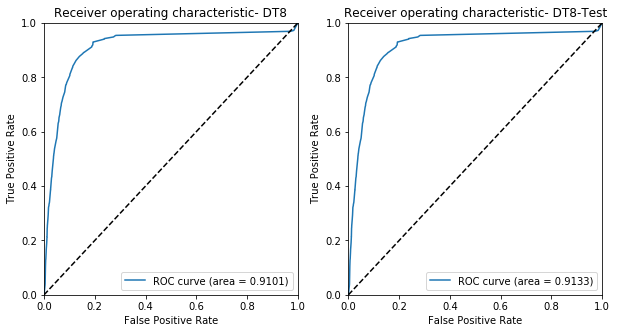

In [17]:
plt.clf()
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fprDT8, tprDT8, label='ROC curve (area = %0.4f)' % roc_aucDT8)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('DT8'))
plt.legend(loc="lower right")
plt.savefig('DT8_roc.png')
plt.subplot(1, 2, 2)
plt.plot(fprDT8, tprDT8, label='ROC curve (area = %0.4f)' % roc_aucDT8_Test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('DT8-Test'))
plt.legend(loc="lower right")
plt.show()

# 2.3. Random Forest

Random forest generira ansambl stabla odlučivanja (engl. decision trees) i uprosječuje njihova predviđanja. Svako stablo je izgrađeno na slučajnom podskupu (s ponavljanjem) skupa za učenje i prilikom izgradnje svakog stabla se uvijek uzima slučajni podskup značajki za izgradnju svakog pojedinog čvora. Paranetar n_estimators regulira broj stabala dok parametar max_features regulira broj nasumično odabranih značajki koje se razmatraju prilikom izgradnje svakog čvora. Parametar max_depth regulira maksimalnu dubinu stabala u ansamblu

In [18]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(data_X, data_y, test_size=0.33, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train_RF)
X_train_trs_RF =scaler.transform(X_train_RF)
X_test_trs_RF =scaler.transform(X_test_RF)

### 2.3.1 max_depth=5, n_estimators=2, max_features=1

In [19]:
modelRF = RandomForestClassifier(max_depth=5, n_estimators=2, max_features=1)
modelRFFit = modelRF.fit(X_train_trs_RF, y_train_RF)

probasRF_ = modelRFFit.predict_proba(X_test_trs_RF)
fprRF, tprRF, thresholdsRF = roc_curve(y_test_RF, probasRF_[:, 1])
roc_aucRF = auc(fprRF, tprRF)

probasRF_Test_ = modelRFFit.predict_proba(test_X_trs)
fprRF_Test, tprRF_Test, thresholdsRF_Test = roc_curve(test_y, probasRF_Test_[:, 1])
roc_aucRF_Test = auc(fprRF_Test, tprRF_Test)

accuracyRF =  modelRF.score(X_test_trs_RF, y_test_RF);
accuracyRF_Test =  modelRF.score(test_X_trs, test_y);

print("Accuracy RF: ")
print(accuracyRF)
print("")
print("Accuracy RF_Test: ")
print(accuracyRF_Test)

Accuracy RF: 
0.887515633046421

Accuracy RF_Test: 
0.8909929594561787


In [20]:
imp=modelRF.feature_importances_
var2imp=dict(zip(list(df1),imp))
var2imp_sorted=pd.DataFrame(columns=['variable','weight'])
for key in sorted(var2imp, key=lambda k:abs(var2imp[k]),reverse=True):
    temp=pd.DataFrame([[key,var2imp[key]]],columns=['variable','weight'])
    var2imp_sorted=var2imp_sorted.append(temp)
print("Top 10 important variables:")
print(var2imp_sorted[0:10])

Top 10 important variables:
             variable    weight
0            duration  0.229892
0        emp.var.rate  0.222231
0           month_oct  0.216377
0         job_student  0.072364
0    poutcome_success  0.068267
0          default_no  0.042923
0                 age  0.033795
0               pdays  0.022600
0           month_apr  0.020361
0  education_basic.9y  0.012350


<Figure size 432x288 with 0 Axes>

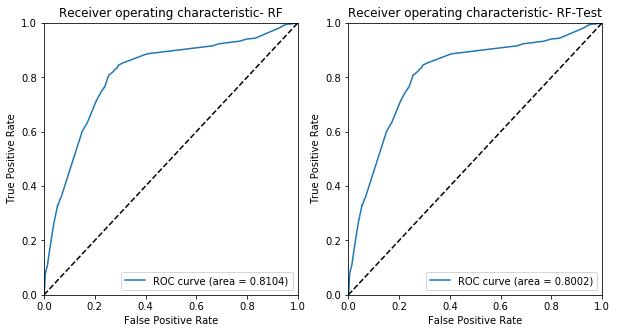

In [21]:
plt.clf()
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fprRF, tprRF, label='ROC curve (area = %0.4f)' % roc_aucRF)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('RF'))
plt.legend(loc="lower right")
plt.savefig('RF_roc.png')
plt.subplot(1, 2, 2)
plt.plot(fprRF, tprRF, label='ROC curve (area = %0.4f)' % roc_aucRF_Test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('RF-Test'))
plt.legend(loc="lower right")
plt.show()

### 2.3.2 max_depth=5, n_estimators=2, max_features=3

In [22]:
modelRF2 = RandomForestClassifier(max_depth=5, n_estimators=2, max_features=3)
modelRFFit2 = modelRF2.fit(X_train_trs_RF, y_train_RF)

probasRF2_ = modelRFFit2.predict_proba(X_test_trs_RF)
fprRF2, tprRF2, thresholdsRF2 = roc_curve(y_test_RF, probasRF2_[:, 1])
roc_aucRF2 = auc(fprRF2, tprRF2)

probasRF2_Test_ = modelRFFit2.predict_proba(test_X_trs)
fprRF2_Test, tprRF2_Test, thresholdsRF2_Test = roc_curve(test_y, probasRF2_Test_[:, 1])
roc_aucRF2_Test = auc(fprRF2_Test, tprRF2_Test)

accuracyRF2 =  modelRF2.score(X_test_trs_RF, y_test_RF);
accuracyRF2_Test =  modelRF2.score(test_X_trs, test_y);

print("Accuracy RF2: ")
print(accuracyRF2)
print("")
print("Accuracy RF2_Test: ")
print(accuracyRF2_Test)

Accuracy RF2: 
0.896270139042154

Accuracy RF2_Test: 
0.8953629521728574


<Figure size 432x288 with 0 Axes>

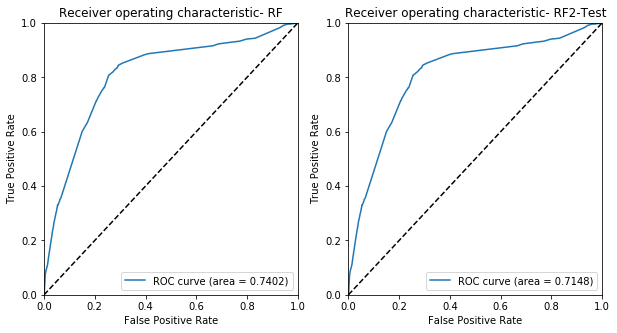

In [23]:
plt.clf()
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fprRF, tprRF, label='ROC curve (area = %0.4f)' % roc_aucRF2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('RF'))
plt.legend(loc="lower right")
plt.savefig('RF2_roc.png')
plt.subplot(1, 2, 2)
plt.plot(fprRF, tprRF, label='ROC curve (area = %0.4f)' % roc_aucRF2_Test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('RF2-Test'))
plt.legend(loc="lower right")
plt.show()

### 2.3.3. max_depth=5, n_estimators=4, max_features=1

In [24]:
modelRF3 = RandomForestClassifier(max_depth=5, n_estimators=4, max_features=1)
%time modelRFFit3 = modelRF3.fit(X_train_trs_RF, y_train_RF)
print("")
probasRF3_ = modelRFFit3.predict_proba(X_test_trs_RF)

fprRF3, tprRF3, thresholdsRF3 = roc_curve(y_test_RF, probasRF3_[:, 1])
roc_aucRF3 = auc(fprRF3, tprRF3)

probasRF3_Test_ = modelRFFit3.predict_proba(test_X_trs)
fprRF3_Test, tprRF3_Test, thresholdsRF3_Test = roc_curve(test_y, probasRF3_Test_[:, 1])
roc_aucRF3_Test = auc(fprRF3_Test, tprRF3_Test)

accuracyRF3 =  modelRF3.score(X_test_trs_RF, y_test_RF);
accuracyRF3_Test =  modelRF3.score(test_X_trs, test_y);

print("Accuracy RF3: ")
print(accuracyRF3)
print("")
print("Accuracy RF3_Test: ")
print(accuracyRF3_Test)

Wall time: 37.9 ms

Accuracy RF3: 
0.8870006621054954

Accuracy RF3_Test: 
0.890507404709881


<Figure size 432x288 with 0 Axes>

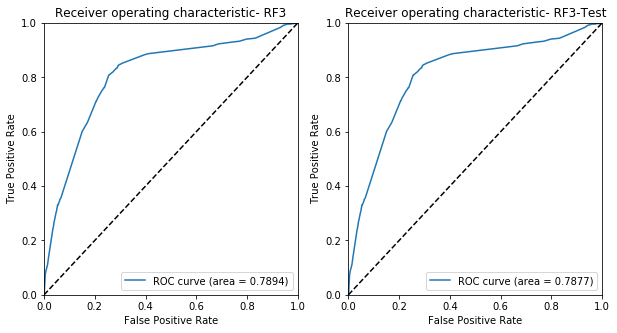

In [25]:
plt.clf()
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fprRF, tprRF, label='ROC curve (area = %0.4f)' % roc_aucRF3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('RF3'))
plt.legend(loc="lower right")
plt.savefig('RF3_roc.png')
plt.subplot(1, 2, 2)
plt.plot(fprRF, tprRF, label='ROC curve (area = %0.4f)' % roc_aucRF3_Test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('RF3-Test'))
plt.legend(loc="lower right")
plt.show()

# 2.4. SVN

Koristit ćemo SVM implementiran u funkciji sklearn.svm.SVC koji interno koristi libsvm.
Za SVM ćemo koristiti sklearn.svm.SVC.decision_function() koja vraća udaljenost od decizijske hiperravnine. Potporni vektori su oni primjeri koji leže na udaljenost 1 od hiperravnine.

In [26]:
X_train_SVN, X_test_SVN, y_train_SVN, y_test_SVN = train_test_split(data_X, data_y, test_size=0.33, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train_SVN)
X_train_trs_SVN =scaler.transform(X_train_SVN)
X_test_trs_SVN =scaler.transform(X_test_SVN)

In [27]:
kernel = 'rbf' # 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
modelSVN = Pipeline([('SVM', svm.SVC(kernel=kernel, probability=True))]) 
%time modelSVNFit = modelSVN.fit(X_train_trs_SVN, y_train_SVN)
print("");
probasSVN_ = modelSVNFit.predict_proba(X_test_trs_SVN)
fprSVN, tprSVN, thresholdsSVN = roc_curve(y_test_SVN, probasSVN_[:, 1])
roc_aucSVN = auc(fprSVN, tprSVN)

probasSVN_Test_ = modelSVNFit.predict_proba(test_X_trs)
fprSVN_Test, tprSVN_Test, thresholdsSVN_Test = roc_curve(test_y, probasSVN_Test_[:, 1])
roc_aucSVN_Test = auc(fprSVN_Test, tprSVN_Test)


accuracySVN =  modelSVN.score(X_test_trs_SVN, y_test_SVN);
accuracySVN_Test =  modelSVN.score(test_X_trs, test_y);

print("Accuracy SVN: ")
print(accuracySVN)
print("Accuracy SVN_Test: ")
print(accuracySVN_Test)


Wall time: 3min 16s

Accuracy SVN: 
0.8968586772603546
Accuracy SVN_Test: 
0.9009468317552805


<Figure size 432x288 with 0 Axes>

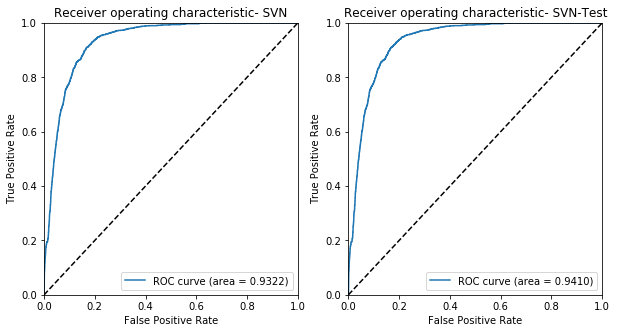

In [28]:
plt.clf()
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fprSVN, tprSVN, label='ROC curve (area = %0.4f)' % roc_aucSVN)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('SVN'))
plt.legend(loc="lower right")
plt.savefig('SVN_roc.png')
plt.subplot(1, 2, 2)
plt.plot(fprSVN, tprSVN, label='ROC curve (area = %0.4f)' % roc_aucSVN_Test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- %s' % ('SVN-Test'))
plt.legend(loc="lower right")
plt.show()

# Literatura

[1] Moro, S., Cortez, P., Rita, P.: A Data-
Driven Approach to Predict the Success of Bank Telemarketing, 2014.

[2]  Choong, A.:  Predictive Analytics in 
Marketing: A Practical Example from Retail Banking, Singapore Actuarial Society, 2017.

[3]  Jiang, Y.:  Using Logistic Regression 
Model to Predict the Success of Bank Telemarketing, International Journal on Data Science and Technology, Vol. 4, No. 1, 2018, pp. 35-41. doi: 10.11648/j.ijdst.20180401.15

[4]  Ejaz, S.: Predicting Demographic and 
Financial Attributes in a Bank Marketing Dataset, 2016., diplomski rad

[5]  Kim, K., Lee, C., Jo, S.,Cho, S.: Predicting 
the Success of Bank Telemarketing using Deep Convolutional Neural Network,2015.

[6]  Wang, Y.: Building multiple machine 
learning models for success of bank
telemarketing using scikit-learn, 2017. 

[7]  Yang, C.: Predicting Success of Bank 
Telemarketing with Classification Trees and Logistic Regression,2016., diplomski rad

[8]  Cultivating the Customer Relationship in 
Banking, A. T. Kearney, izvještaj, 2017. 

[9] Dataset: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
  
[10] http://scikit-learn.org/stable/index.html
  
[11] http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

[12] http://scikit-earn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[13] http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

[14] http://scikit-learn.org/stable/modules/tree.html
